# Data exploration

In [2]:
import pandas as pd
videos = pd.read_csv('transcoding_mesurment.tsv', delimiter='\t')

In [3]:
vid_rows, vid_cols = videos.shape
print(f'Number of rows: {vid_rows}, number of columns: {vid_cols}')

Number of rows: 68784, number of columns: 22


In [3]:
videos.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


Purpose: The head() method is used to display the first few rows of a DataFrame. It is useful for quickly inspecting the structure and content of the data.

In [4]:
videos.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


Purpose: The describe() method provides descriptive statistics of the numerical columns in a DataFrame, such as count, mean, std (standard deviation), min, quartiles, and max.

In [5]:
videos.isnull().values.any()

False

There are no empty values, but not all columns serve a purpose in further analysis and training the model. We drop the id column.

In [6]:
videos = videos.drop(['id'], axis=1)
videos.head()

,duration,codec,width,height,bitrate,framerate,i,p,b,frames,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [7]:
videos.dtypes

duration       float64
codec           object
width            int64
height           int64
bitrate          int64
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
b_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

We need to convert codec and o_codec to a quantitative form. We'll convert them to a 'category' type for now and use one-hot encoding later.

In [8]:
videos['codec'] = videos['codec'].astype('category')
videos['o_codec'] = videos['o_codec'].astype('category')

In [9]:
videos.dtypes

duration        float64
codec          category
width             int64
height            int64
bitrate           int64
framerate       float64
i                 int64
p                 int64
b                 int64
frames            int64
i_size            int64
p_size            int64
b_size            int64
size              int64
o_codec        category
o_bitrate         int64
o_framerate     float64
o_width           int64
o_height          int64
umem              int64
utime           float64
dtype: object

## Correlations

<Axes: >

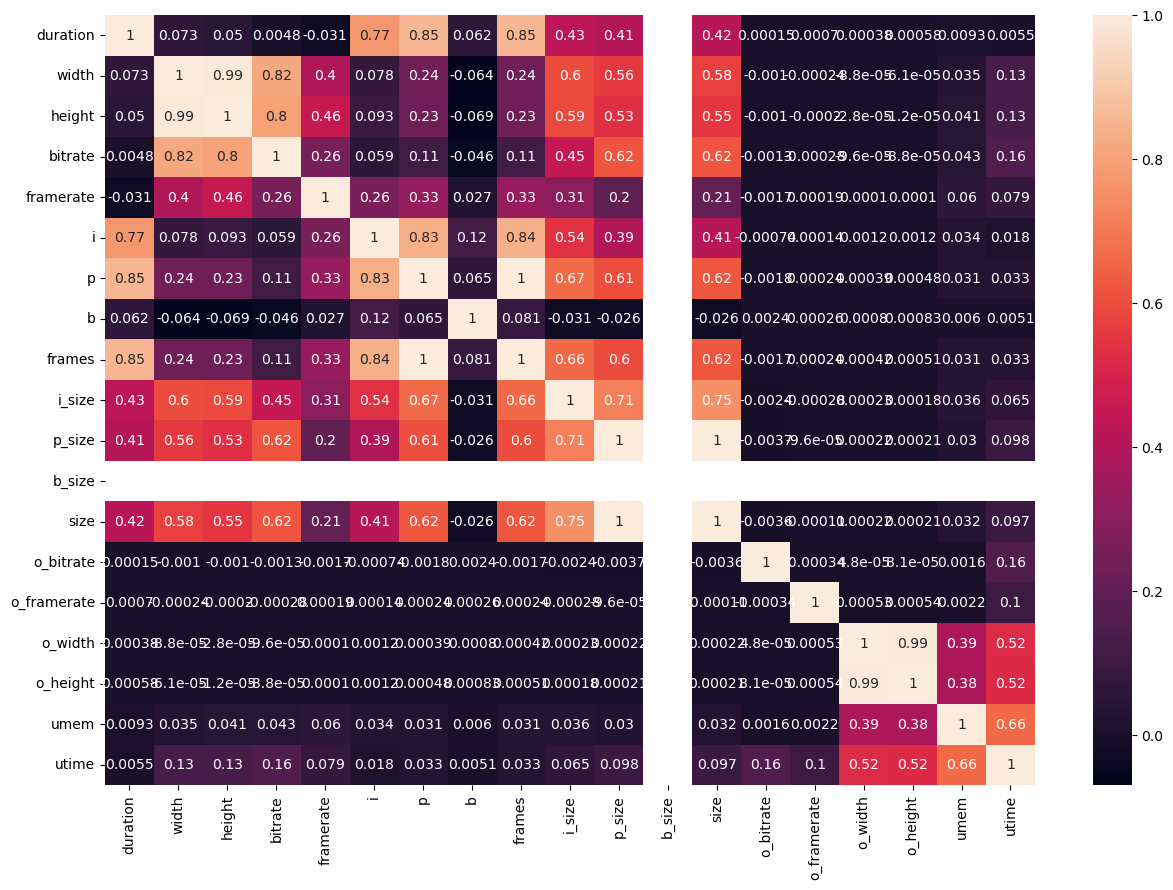

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
videos_nc = videos.drop(['codec', 'o_codec'], axis=1)

f, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(videos_nc.corr(), annot=True)

Parameters that may have substantial impact on transcoding time are: video resolution (both input and output), bitrate and amount of different types of frames in a video (i-frames, p-frames, b-frames).
Not included in the above heatmap are input and output codecs as those are not represented as numerical values. They might however have an impact on transcoding time and are worth analysing.

<Axes: title={'center': 'Influence of b frames ratio on transcoding time.'}, xlabel='b_ratio'>

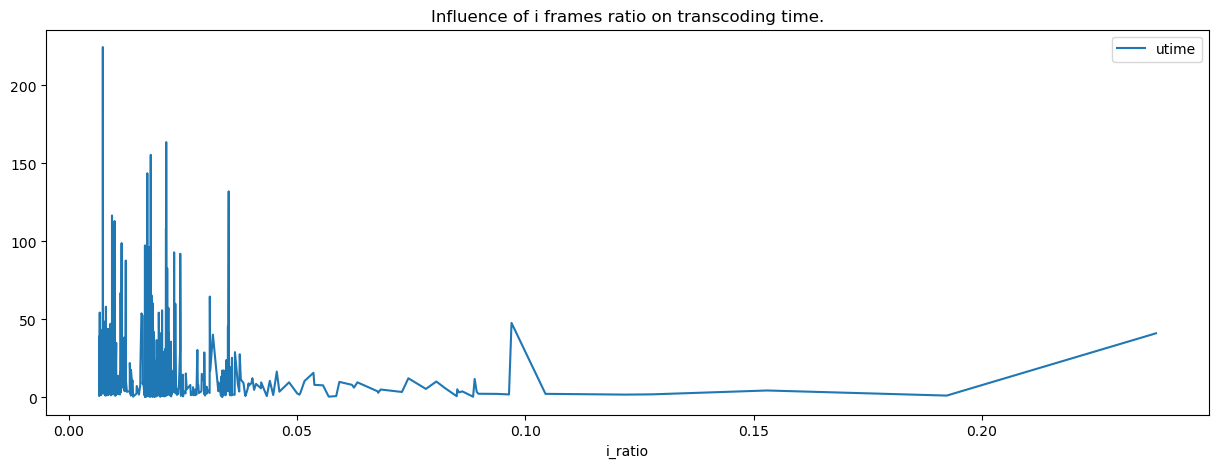

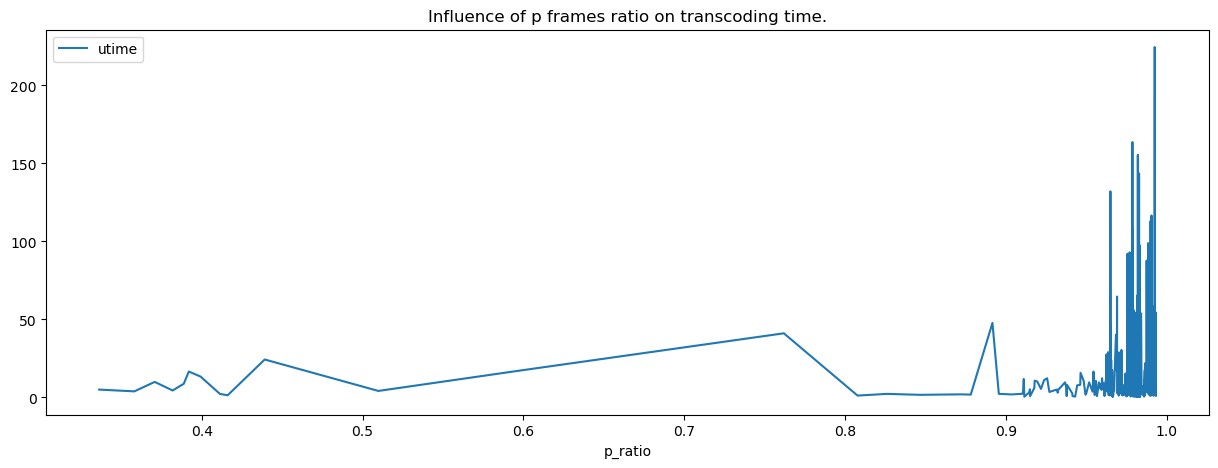

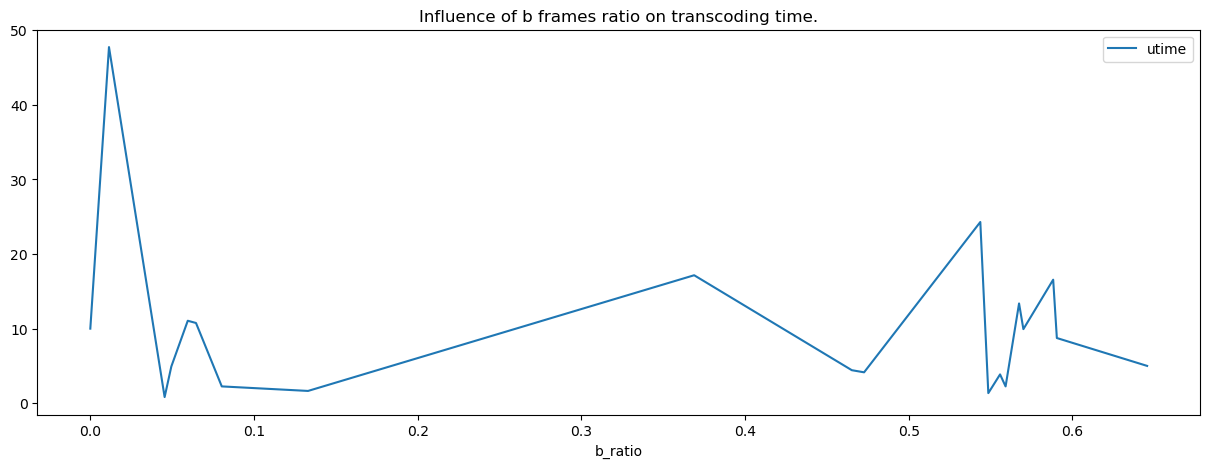

In [11]:
videos['i_ratio'] = videos['i'] / videos['frames']
videos['p_ratio'] = videos['p'] / videos['frames']
videos['b_ratio'] = videos['b'] / videos['frames']

i_pt = videos.pivot_table('utime', index='i_ratio')
p_pt = videos.pivot_table('utime', index='p_ratio')
b_pt = videos.pivot_table('utime', index='b_ratio')

i_pt.plot(figsize=(15, 5), title="Influence of i frames ratio on transcoding time.")
p_pt.plot(figsize=(15, 5), title="Influence of p frames ratio on transcoding time.")
b_pt.plot(figsize=(15, 5), title="Influence of b frames ratio on transcoding time.")

1. The more i-frames, the faster the encoding.
2. The more p-frames, the slower the encoding.
3. The more b-frames, the faster the encoding, although the correlation is not as easily visible.

[Text(0, 0.5, 'Conversion from codec to codec')]

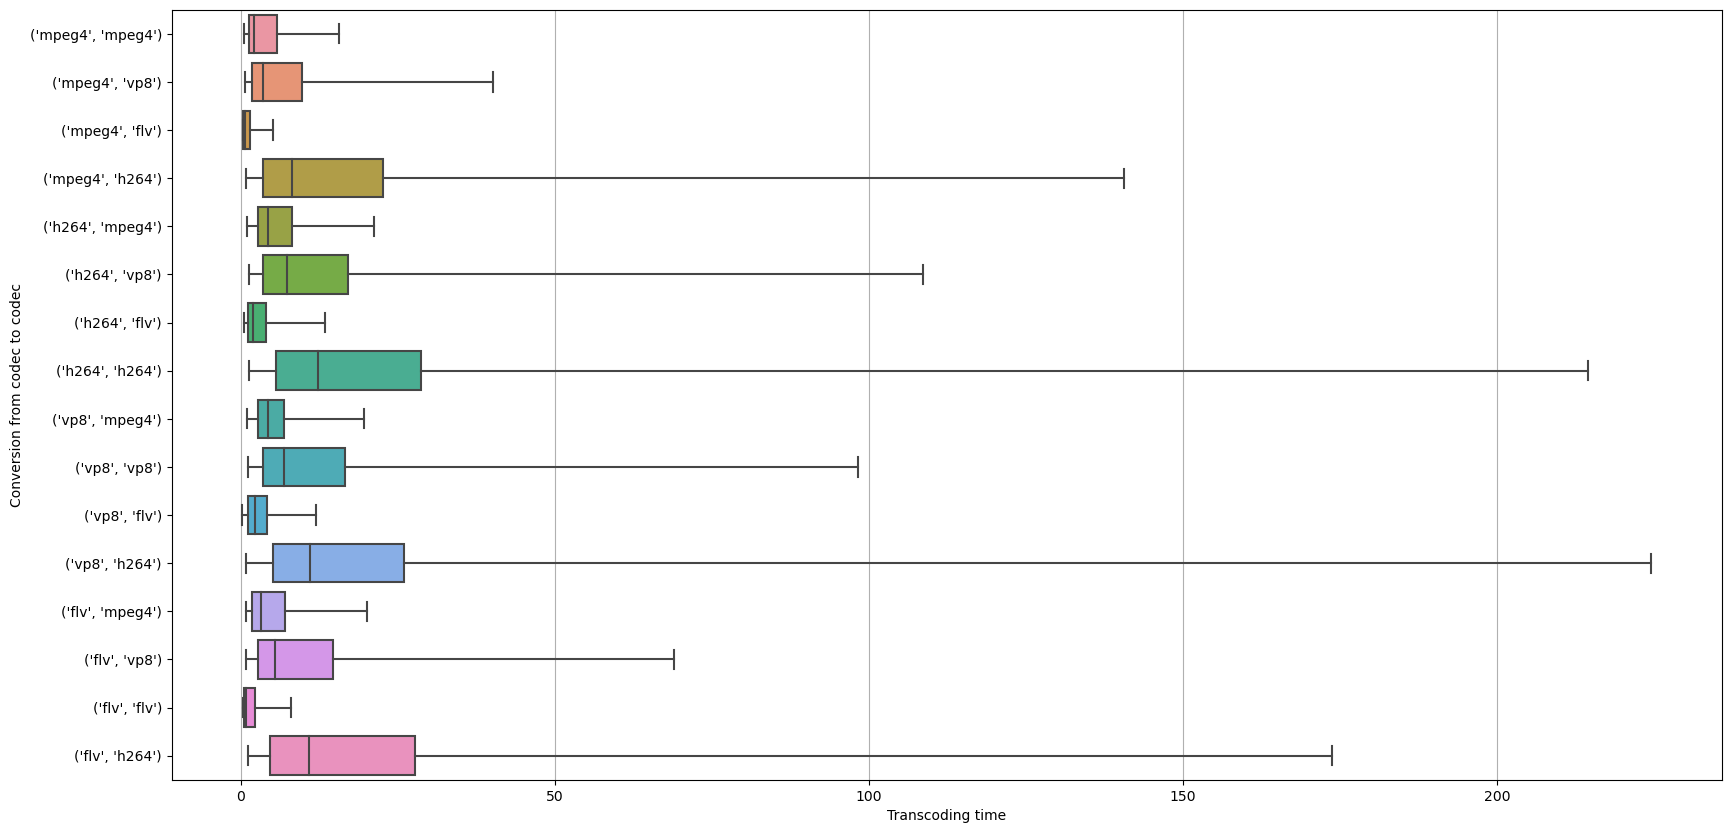

In [12]:
f, ax = plt.subplots(figsize=(20, 10))

videos['codec_conv'] = list(zip(videos['codec'],videos['o_codec']))
sns.boxplot(x="utime", y="codec_conv", data=videos, whis=[0, 100])

ax.xaxis.grid(True)
ax.set(xlabel="Transcoding time")
ax.set(ylabel="Conversion from codec to codec")

The fastest codec to transcode to seems to be flv and the slowest h264

<Axes: xlabel='pixels_ratio'>

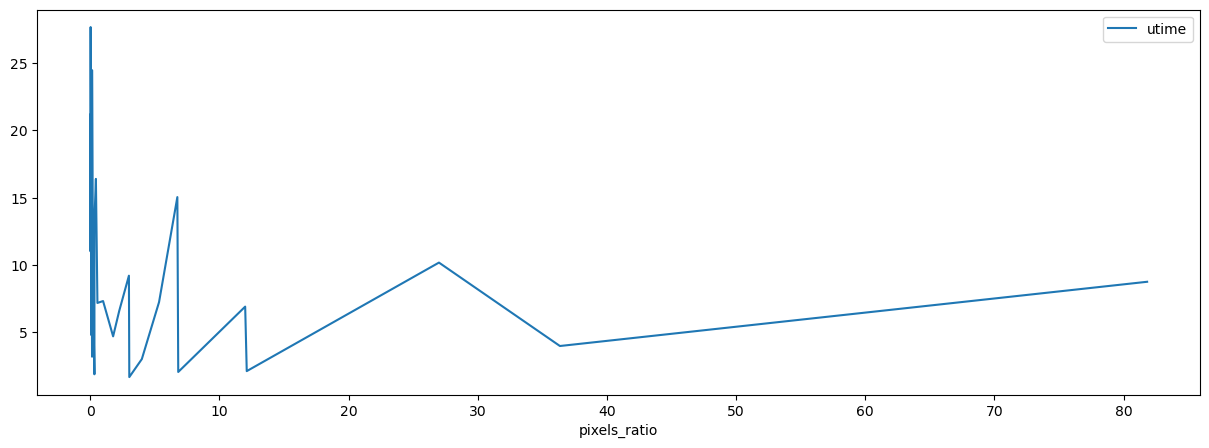

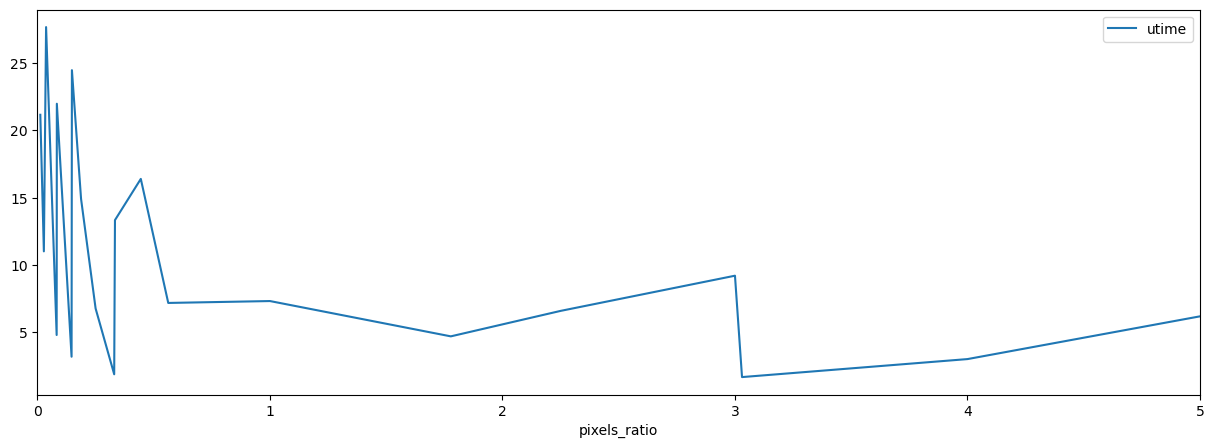

In [13]:
videos['pixels'] = videos['width'] * videos['height']
videos['o_pixels'] = videos['o_width'] * videos['o_height']
videos['pixels_ratio'] = videos['pixels'] / videos['o_pixels']

pixels_pt = videos.pivot_table('utime', index='pixels_ratio')
pixels_pt.plot(figsize=(15, 5))
pixels_pt.plot(figsize=(15, 5), xlim=[0, 5])

<Axes: xlabel='bitrate_ratio'>

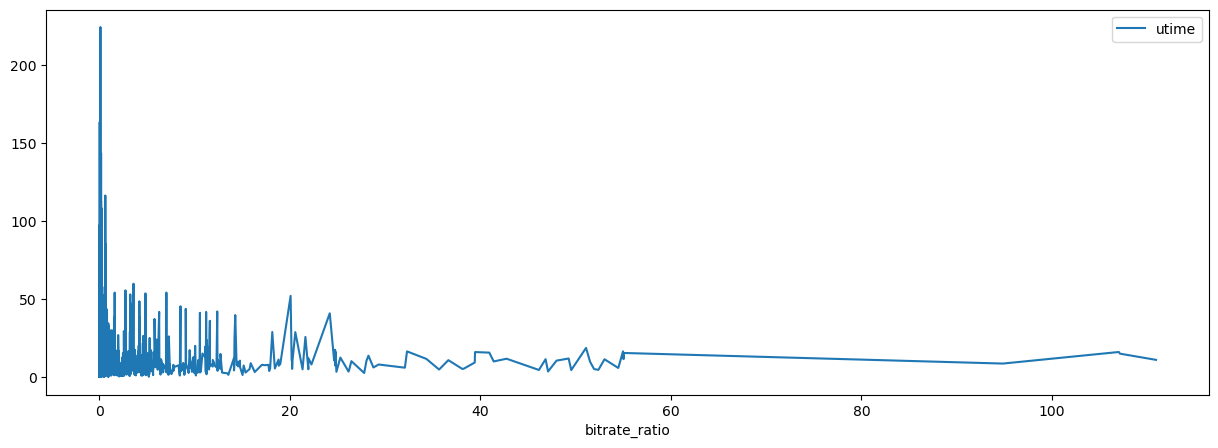

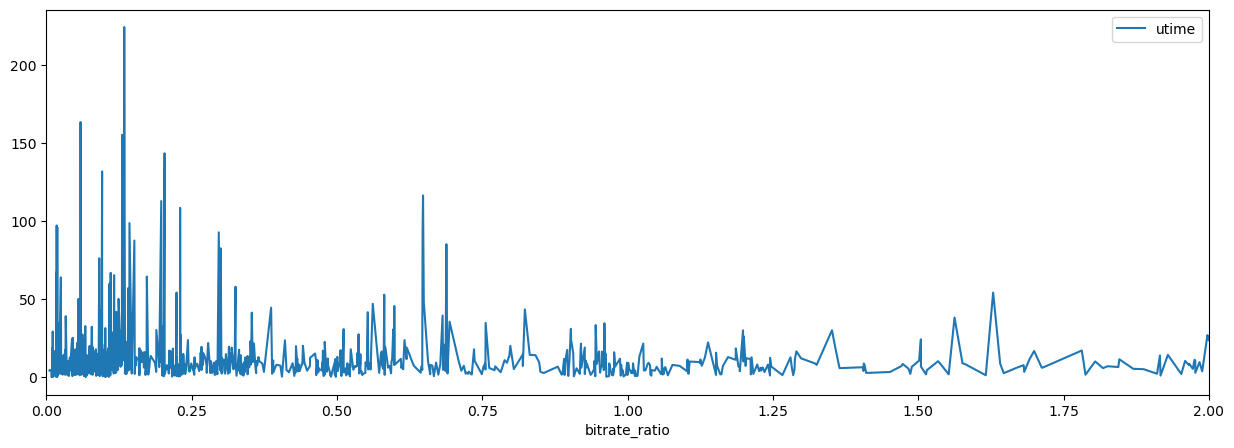

In [14]:
videos['bitrate_ratio'] = videos['bitrate'] / videos['o_bitrate']

bitrate_pt = videos.pivot_table('utime', index='bitrate_ratio')
bitrate_pt.plot(figsize=(15, 5))
bitrate_pt.plot(figsize=(15, 5), xlim=[0, 2])

In case of both resolution and bitrate, the increase of output value compared to input (the ratio of input to output value is lower than 1) tends to increase transcoding time.

# Regression

In [6]:
# Get clean dataset
df = pd.read_csv('transcoding_mesurment.tsv', delimiter='\t')

In [41]:
df.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [7]:
data = df.iloc[1:,1:-1]
target = df.iloc[1:,-1]

In [8]:
import numpy as np
df_encoded_codec = pd.get_dummies(data, columns=['codec'], prefix='codec', dtype=np.int16)
df_encoded_codec.drop(['o_codec'], axis=1, inplace=True)
columns_from_codec = df_encoded_codec.columns
df_encoded_o_codec = pd.get_dummies(data, columns=['o_codec'], prefix='o_codec', dtype=np.int16)
df_encoded_o_codec.drop(['codec'], axis=1, inplace=True)
columns_from_o_codec = df_encoded_o_codec.columns.difference(columns_from_codec)
df_encoded = pd.concat([df_encoded_codec, df_encoded_o_codec[columns_from_o_codec]], axis=1)
print("\nPo kodowaniu:")
pd.set_option('display.max_columns', None)
data = df_encoded
data.head()


Po kodowaniu:


,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
1,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,320,240,25164,0,0,1,0,0,0,1,0
2,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,480,360,29228,0,0,1,0,0,0,1,0
3,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,640,480,34316,0,0,1,0,0,0,1,0
4,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,1280,720,58528,0,0,1,0,0,0,1,0
5,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,1920,1080,102072,0,0,1,0,0,0,1,0


Since 2 columns in the data contained non-numerical values, we converted them into columns using One-Hot Encoding (the number of new columns is the same as the number of different values in the non-numerical columns) so that the resulting data is suitable for regression (all characteristics have numerical values).

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=12)

# Standaryzacja
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model_std = LinearRegression()

model_std.fit(X_train_std, y_train)

y_pred_std = model_std.predict(X_test_std)

mse_std = mean_squared_error(y_test, y_pred_std)

In [10]:
print('MSE: %.4f' % mse_std)
print('R2 score: %.4f' % model_std.score(X_test_std, y_test))

MSE: 90.3568
R2 score: 0.6479


In [11]:
scores = cross_val_score(model_std, X_train_std, y_train, cv=5)
print(scores)

[0.66028797 0.6476379  0.65663767 0.64853468 0.6661347 ]


The use of cross-validation has no measurable effect compared to typical linear regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)
X_train_poly = pf.fit_transform(X_train_std)
X_test_poly = pf.transform(X_test_std)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

print('MSE: %.4f' % mean_squared_error(y_test, y_pred_poly)) 
#print('R2 score: %.4f' % lr_poly.score(X_test_poly, y_test))

MSE: 411157523.5926


__With a degree greater than 2 it eats up all the ram__.

In [ ]:
# from sklearn.feature_selection import RFE

# rfe = RFE(estimator=LinearRegression(), n_features_to_select=4)
# rfe.fit(X_train_poly, y_train)

# print(rfe.support_)
# print(rfe.ranking_)

In [32]:
# print('MSE: %.4f' % mean_squared_error(y_test, rfe.predict(X_test_poly)))
# print('R2 score: %.4f' % rfe.score(X_test_poly, y_test))

MSE: 256.0709
R2 score: 0.0022


__Polynomial features has too many requirements with this amount of data/features, and RFE doesn't particularly work because it relies on polynomial features.__

for this reason we abandon further testing of these methods

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=12)
tree.fit(X_train_std, y_train)

tree_pred = tree.predict(X_test_std)

MSE: 6.4240
R2 score: 0.9750


In [ ]:
print('MSE: %.4f' % mean_squared_error(y_test, tree_pred))
print('R2 score: %.4f' % tree.score(X_test_std, y_test))

In [47]:
scores = cross_val_score(tree, X_train_std, y_train, cv=5)
print(scores)

[0.96407846 0.96417418 0.9682665  0.96478404 0.96141098]


cross-validation has no significant benefits compared to a decision tree

In [50]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=12)
forest.fit(X_train_std, y_train)

forest_pred = forest.predict(X_test_std)

In [51]:
print('MSE: %.4f' % mean_squared_error(y_test, forest_pred))
print('R2 score: %.4f' % forest.score(X_test_std, y_test))

MSE: 3.4025
R2 score: 0.9867


In [52]:
scores = cross_val_score(forest, X_train_std, y_train, cv=5)
print(scores)

[0.98229202 0.98360363 0.97978167 0.98307487 0.98199814]


## Grid search

It seems that Random Forest Regressor provides the best model, but let's do a grid search.

In [54]:
from sklearn.model_selection import GridSearchCV

linear_params = {}
tree_params = {'max_depth': [None, 10, 20, 30],
               'min_samples_split': [2, 5, 10]}
forest_params = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10]}

linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

linear_grid = GridSearchCV(linear_reg, linear_params, scoring='neg_mean_squared_error', cv=5)
tree_grid = GridSearchCV(tree_reg, tree_params, scoring='neg_mean_squared_error', cv=5)
forest_grid = GridSearchCV(forest_reg, forest_params, scoring='neg_mean_squared_error', cv=5)

linear_grid.fit(X_train_std, y_train)
tree_grid.fit(X_train_std, y_train)
forest_grid.fit(X_train_std, y_train)

linear_pred = linear_grid.predict(X_test_std)
tree_pred = tree_grid.predict(X_test_std)
forest_pred = forest_grid.predict(X_test_std)

In [56]:
from sklearn.metrics import r2_score

linear_mse = mean_squared_error(y_test, linear_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
forest_mse = mean_squared_error(y_test, forest_pred)

linear_r2 = r2_score(y_test, linear_pred)
tree_r2 = r2_score(y_test, tree_pred)
forest_r2 = r2_score(y_test, forest_pred)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression R2 Score:", linear_r2)

print("Decision Tree Regression MSE:", tree_mse)
print("Decision Tree Regression R2 Score:", tree_r2)

print("Random Forest Regression MSE:", forest_mse)
print("Random Forest Regression R2 Score:", forest_r2)

print("Best Linear Regression Hyperparameters:", linear_grid.best_params_)
print("Best Decision Tree Hyperparameters:", tree_grid.best_params_)
print("Best Random Forest Hyperparameters:", forest_grid.best_params_)

Linear Regression MSE: 90.37151009290098
Linear Regression R2 Score: 0.6478430424968326
Decision Tree Regression MSE: 6.460734561059823
Decision Tree Regression R2 Score: 0.9748240056637372
Random Forest Regression MSE: 3.4193101545785054
Random Forest Regression R2 Score: 0.9866757359752182
Best Linear Regression Hyperparameters: {}
Best Decision Tree Hyperparameters: {'max_depth': 30, 'min_samples_split': 2}
Best Random Forest Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
